<a href="https://colab.research.google.com/github/Sanjay05-coder/ANN-BasicClassification-Predicting-Breast-Cancer.ipynb/blob/main/ANN_BasicClassification_Predicting_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf #Import the core tensorflow library
from tensorflow import keras #Import the Keras API, whihx is now the official high-level API for building and training deep learning models in Tensorflow
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import pandas as pd

#Malignant - Cancerous
#Beningn-NonCancerous

Load dataset

In [3]:
df=pd.read_csv("/content/Breast Cancer Wisconsin.csv.crdownload")

Evaluate dataset

In [4]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
#getting length of column

len(df.columns)

32

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df['diagnosis']

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [9]:
df.isnull().sum()# no missing vals

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [13]:
df.drop(columns=['id'],inplace=True)# drop id column

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# convert diagnosis to binary

In [16]:
df['diagnosis'].unique()

#M-Malignant (1)
#B-Benign    (0)

# we can use label encoder which does a simillar job but the computer decides its values
#since it is a medical dataset is better to use map fucntion to converts its value to our preference

df['diagnosis']=df['diagnosis'].map({"M":1,"B":0})

df['diagnosis']

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


#Create the feature and target

In [19]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Normalize The data

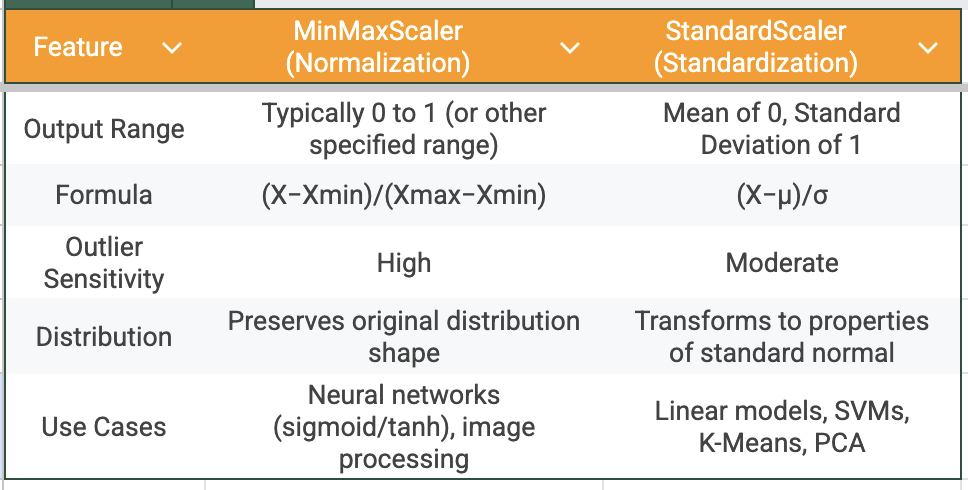


In [21]:
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

#Create Neural Network

In [22]:
input_dim = X_train_scaled.shape[1]

input_dim

30

In [23]:
model = keras.Sequential([
    layers.Dense(input_dim,activation='relu',input_shape = [input_dim]),#Input and hidden layer
    layers.Dense(1,'sigmoid')#Output layer,since we are only predictiong a single value 1 connection will do and the activation is sigmoid since we are predicting a binary class
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# compile model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])



#Epoch

* An "epoch" is one complete pass through the entire training dataset.

* Setting epochs=100 means the training algorithm will iterate over all the training examples 100 times.

* During each epoch, the model updates its internal weights and biases based on the errors it makes on the training data.

#Validation split

* This is an important parameter for monitoring the model's performance during training and detecting overfitting.

* It tell the fit method to allocate serveral data from the training data as a validation data.

* validation_slit = 0.2 means 20% of the X_train_scaled and y_train data will be used for validation and reminging 80 % will be used for accual training.

#Batch Size

* A "batch" is a subset of the training data that is used in one iteration of training.

* Setting batch_size=32 means that the training data will be divided into chunks of 32samples. The model's weights will be updated after processing each batch of 32 samples, rather than after processing all training samples (which would be batch_size = len(X_train_scaled)).

`To make your model to train fast , you can increase the batch size`

In [26]:
#train the model

created_model = model.fit(X_train_scaled,y_train,epochs = 100,batch_size=32,validation_split=0.2)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4593 - loss: 0.6842 - val_accuracy: 0.7363 - val_loss: 0.6542
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7177 - loss: 0.6499 - val_accuracy: 0.8901 - val_loss: 0.6312
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8540 - loss: 0.6354 - val_accuracy: 0.9121 - val_loss: 0.6113
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8595 - loss: 0.6128 - val_accuracy: 0.8901 - val_loss: 0.5920
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8689 - loss: 0.5939 - val_accuracy: 0.8791 - val_loss: 0.5728
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9047 - loss: 0.5743 - val_accuracy: 0.8791 - val_loss: 0.5533
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8762 - loss: 0.5542 - val_accuracy: 0.8681 - val_loss: 0.5340
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8900 - loss: 0.5356 - val_accuracy: 0.8681

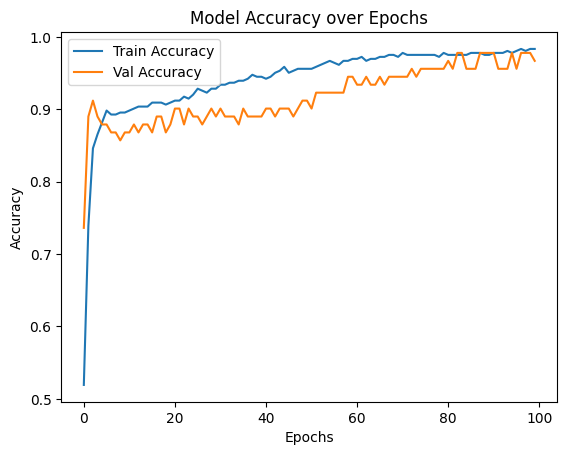

In [27]:
# Plot accuracy
import matplotlib.pyplot as plt # Import pyplot
plt.plot(created_model.history['accuracy'], label='Train Accuracy') # Access history correctly
plt.plot(created_model.history['val_accuracy'], label='Val Accuracy') # Access history correctly
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Evaluate the model

In [28]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9815 - loss: 0.0819

Test Accuracy: 0.9825


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Confusion Matrix:
[[70  1]
 [ 1 42]]


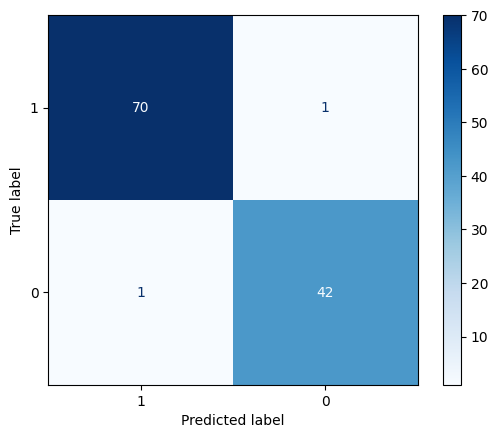

In [29]:
# Predict
y_pred = (model.predict(X_test_scaled)>0.5 ).astype("int32")
#Any probability score greater than 0.5 is evaluated as True.
#For normal binary classification the set threshold is 0.5 , you can refer to logistics regression notes for details

# Show metrics
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

display_cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),display_labels=y.unique())

display_cm.plot(cmap='Blues')

#Predicting New Data

In [30]:
new_sample = [[14.0, 20.0, 90.0, 600.0, 0.1, 0.15, 0.2, 0.1, 0.2, 0.07,
               0.3, 1.0, 2.0, 25.0, 0.007, 0.02, 0.03, 0.01, 0.02, 0.005,
               16.0, 25.0, 100.0, 800.0, 0.12, 0.25, 0.3, 0.15, 0.3, 0.08]]

##Preprocess the new samples

In [31]:
new_samples_scale = scaler.transform(new_sample)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [32]:
#Predict we use prediction label as additonal is cauz we use sigmoid so above 0.5 shows true or lower false and the int32 converts the boolean to int
prediction = model.predict(new_samples_scale)
prediction_label = (prediction > 0.5).astype("int32")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [33]:
#Interpret the results


if prediction_label[0][0] == 1:
  print("Prediction : Malignant (Cancerous)")
else:
  print("Prediction : Benign (Non-cancerous)")

Prediction : Malignant (Cancerous)
